In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/disease-symptom-description-dataset/dataset.csv")
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = df.columns
vals = df[cols].values.flatten()

vals_ser = pd.Series(vals)
vals_ser = vals_ser.str.strip()
vals_ser = vals_ser.values.reshape(df.shape)

df = pd.DataFrame(vals_ser, columns=df.columns)

df = df.replace('dischromic _patches', 'dischromic_patches')
df = df.replace('spotting_ urination','spotting_urination')
df = df.replace('foul_smell_of urine','foul_smell_ofurine')

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
condition = (df['Disease'] == 'Fungal infection') | (df['Disease'] == 'Impetigo') | (df['Disease'] == 'Acne')
filtered_df = df[condition]
filtered_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X = filtered_df.drop('Disease', axis=1)
y = filtered_df['Disease']
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def merge_boolean_columns(data):
    merged_data = data.copy()
    unique_columns = set(data.columns)

    for column in unique_columns:
        columns_to_merge = data.columns[data.columns == column]
        if len(columns_to_merge) > 1:
            merged_column = data[columns_to_merge].any(axis=1)
            merged_data.drop(columns_to_merge, axis=1, inplace=True)
            merged_data[column] = merged_column
    return merged_data


for col in X.columns:
    encX = pd.get_dummies(X[col])
    X = pd.concat([X, encX], axis=1)
    X.drop(col, axis=1, inplace=True)
    
X_merged = merge_boolean_columns(X)

print(X.shape)
print(X_merged.shape)

(360, 21)
(360, 11)


In [7]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
y_enc = label_encoder.fit_transform(y)

print("Class Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} -> {label}")

Class Mapping:
0 -> Acne
1 -> Fungal infection
2 -> Impetigo


In [8]:
X_merged.shape


(360, 11)

In [9]:
y_clsses = label_encoder.classes_


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

X_train, X_cv, y_train, y_cv = train_test_split(X_merged, y_enc, test_size=0.3)

param_grid = {'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [3, 4, 5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

model = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 42 candidates, totalling 210 fits


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=4,
                       random_state=1024)

In [11]:
model = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4, random_state=1024)

# Train
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_cv)

# Evaluation
print(classification_report(y_cv, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        37

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, 
                           feature_names=X_merged.columns,  
                           class_names=y_clsses,  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("dt_mini_version", format='png')
graph.view()

'dt_mini_version.png'

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'dt_mini_version.png'


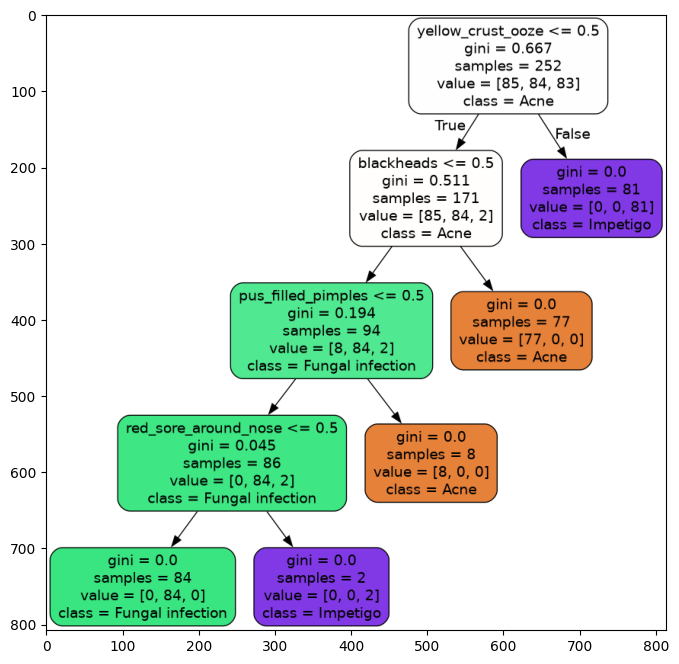

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/dt_mini_version.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show()

In [14]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)
check_df = filtered_df[filtered_df['Disease']=='Impetigo']
check_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
400,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4796,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4837,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4878,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
check_df = filtered_df[filtered_df['Disease']=='Fungal infection']
check_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4756,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4797,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4838,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = pd.read_csv("/kaggle/input/disease-symptom-description-dataset/dataset.csv")
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.shape


(4920, 18)

In [18]:
cols = df.columns
vals = df[cols].values.flatten()

vals_ser = pd.Series(vals)
vals_ser = vals_ser.str.strip()
vals_ser = vals_ser.values.reshape(df.shape)

df = pd.DataFrame(vals_ser, columns=df.columns)

df = df.replace('dischromic _patches', 'dischromic_patches')
df = df.replace('spotting_ urination','spotting_urination')
df = df.replace('foul_smell_of urine','foul_smell_ofurine')

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
X = df.drop('Disease', axis=1)
y = df['Disease']
X

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def merge_boolean_columns(data):
    merged_data = data.copy()
    unique_columns = set(data.columns)

    for column in unique_columns:
        columns_to_merge = data.columns[data.columns == column]
        if len(columns_to_merge) > 1:
            merged_column = data[columns_to_merge].any(axis=1)
            merged_data.drop(columns_to_merge, axis=1, inplace=True)
            merged_data[column] = merged_column
    return merged_data


for col in X.columns:
    encX = pd.get_dummies(X[col])
    X = pd.concat([X, encX], axis=1)
    X.drop(col, axis=1, inplace=True)
    
X_merged = merge_boolean_columns(X)

print(X.shape)
print(X_merged.shape)

/tmp/ipykernel_33/2844050317.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data[column] = merged_column
/tmp/ipykernel_33/2844050317.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data[column] = merged_column
/tmp/ipykernel_33/2844050317.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

(4920, 394)
(4920, 131)


/tmp/ipykernel_33/2844050317.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data[column] = merged_column
/tmp/ipykernel_33/2844050317.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data[column] = merged_column
/tmp/ipykernel_33/2844050317.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

In [21]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
y_enc = label_encoder.fit_transform(y)

print("Class Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} -> {label}")

Class Mapping:
0 -> (vertigo) Paroymsal  Positional Vertigo
1 -> AIDS
2 -> Acne
3 -> Alcoholic hepatitis
4 -> Allergy
5 -> Arthritis
6 -> Bronchial Asthma
7 -> Cervical spondylosis
8 -> Chicken pox
9 -> Chronic cholestasis
10 -> Common Cold
11 -> Dengue
12 -> Diabetes
13 -> Dimorphic hemmorhoids(piles)
14 -> Drug Reaction
15 -> Fungal infection
16 -> GERD
17 -> Gastroenteritis
18 -> Heart attack
19 -> Hepatitis B
20 -> Hepatitis C
21 -> Hepatitis D
22 -> Hepatitis E
23 -> Hypertension
24 -> Hyperthyroidism
25 -> Hypoglycemia
26 -> Hypothyroidism
27 -> Impetigo
28 -> Jaundice
29 -> Malaria
30 -> Migraine
31 -> Osteoarthristis
32 -> Paralysis (brain hemorrhage)
33 -> Peptic ulcer diseae
34 -> Pneumonia
35 -> Psoriasis
36 -> Tuberculosis
37 -> Typhoid
38 -> Urinary tract infection
39 -> Varicose veins
40 -> hepatitis A


In [22]:
y_clsses = label_encoder.classes_


In [23]:
X_merged.shape


(4920, 131)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

X_train, X_cv, y_train, y_cv = train_test_split(X_merged, y_enc, test_size=0.3)

param_grid = {'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [10, 12, 14, 16, 18],
              'criterion' :['gini', 'entropy']
             }

model = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 30 candidates, totalling 150 fits


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=18,
                       random_state=1024)

In [25]:
model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=18,
                       random_state=1024)

# Train
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_cv)

# Evaluation
print(classification_report(y_cv, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.88      0.94        34
           2       0.69      1.00      0.81        37
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        30
           5       0.94      1.00      0.97        45
           6       1.00      1.00      1.00        41
           7       1.00      0.90      0.95        39
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        43
          10       1.00      1.00      1.00        39
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        33
          13       1.00      0.92      0.96        26
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        31
          17       1.00    

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, 
                           feature_names=X_merged.columns,  
                           class_names=y_clsses,  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data, format='png')
graph.render("dt_overall_version", format='png')
graph.view()

'dt_overall_version.png'

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'dt_overall_version.png'


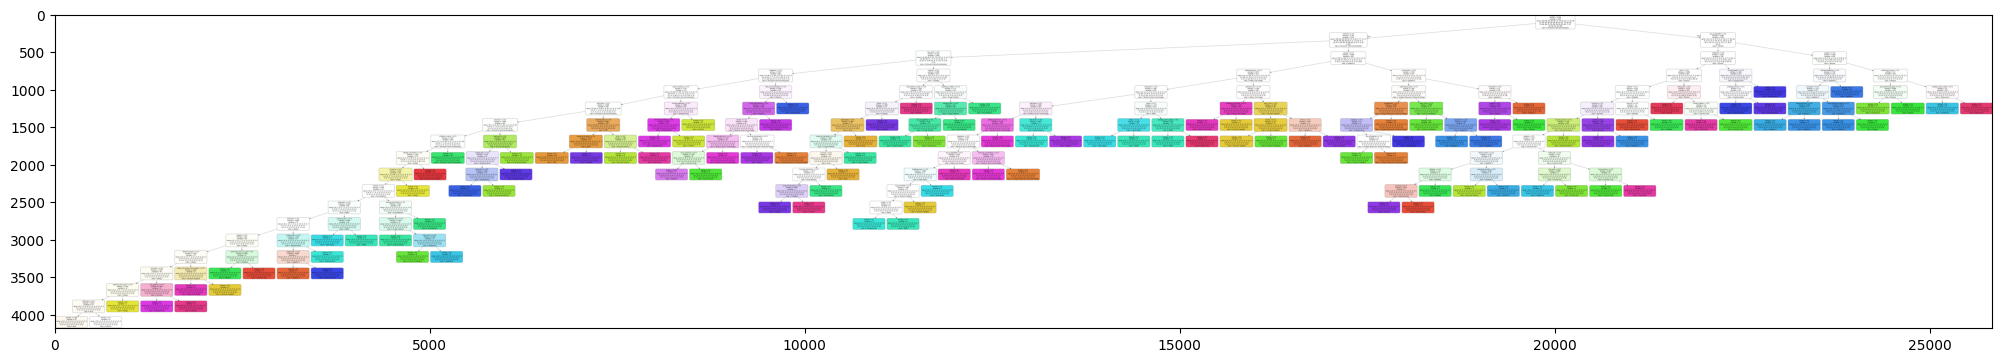

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/working/dt_overall_version.png')
plt.figure(figsize=(25, 25))
plt.imshow(img)
plt.show()